Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3414 - loss: 1.7176 - val_accuracy: 0.5219 - val_loss: 1.3848
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5484 - loss: 1.2960 - val_accuracy: 0.5437 - val_loss: 1.1131
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6019 - loss: 1.0543 - val_accuracy: 0.5594 - val_loss: 1.0094
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6019 - loss: 0.9957 - val_accuracy: 0.5813 - val_loss: 0.9799
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6175 - loss: 0.9619 - val_accuracy: 0.5688 - val_loss: 0.9676
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6196 - loss: 0.9440 - val_accuracy: 0.5688 - val_loss: 0.9575
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6225 - loss: 0.9310 - val_accuracy: 0.5625 - val_loss: 0.9555
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6006 - loss: 0.9606 - val_accuracy: 0.5719 - val_loss: 0.

Test Accuracy: 0.5938
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  2  3  5  0  0]
 [ 0  2 87 38  3  0]
 [ 1  3 31 80 17  0]
 [ 0  0  1 19 21  1]
 [ 0  0  0  0  5  0]]


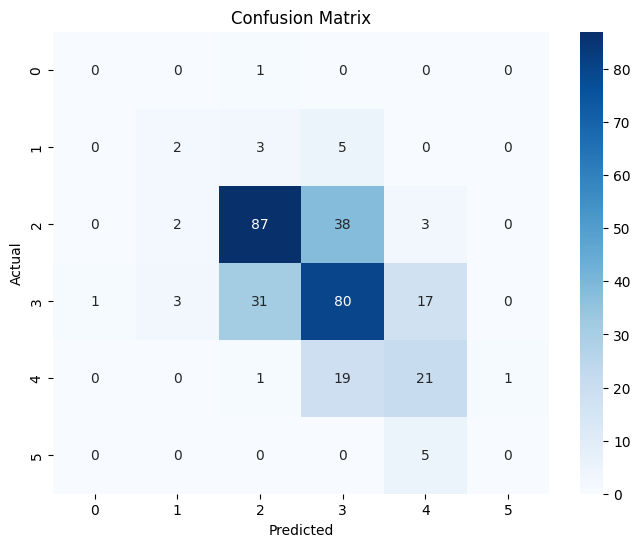

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.29      0.20      0.24        10
           2       0.71      0.67      0.69       130
           3       0.56      0.61      0.58       132
           4       0.46      0.50      0.48        42
           5       0.00      0.00      0.00         5

    accuracy                           0.59       320
   macro avg       0.34      0.33      0.33       320
weighted avg       0.59      0.59      0.59       320

Model Loaded Successfully


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://drive.google.com/uc?export=download&id=1uutPAkOSYb2Uror1mk2dZUtoYbCgz6DO"
data = pd.read_csv(url)

# Splitting features and labels
X = data.drop(columns=['quality'])  # Assuming 'quality' is the target
y = data['quality']

# Convert target into categorical (assuming it's classification)
y = pd.get_dummies(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN Model
model = Sequential([
    Dense(12, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(24, activation='tanh'),
    Dense(30, activation='tanh'),
    Dense(20, activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(y.shape[1], activation='softmax')  # Output layer
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save Model
model.save('wine_quality_model.h5')

# Confusion Matrix & Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test.values, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Load Model for Deployment
def load_model():
    model = keras.models.load_model('wine_quality_model.h5')
    return model

deployed_model = load_model()
print("Model Loaded Successfully")
